<a href="https://www.kaggle.com/code/nizarbousabat/tunisian-stock-market-analysis?scriptVersionId=214321990" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tunisian-stock-market/ALL_DATA.csv
/kaggle/input/tunisian-stock-market/sotcks_list.csv
/kaggle/input/tunisian-stock-market/stocks_market_cap.csv
/kaggle/input/tunisian-stock-market/data/AETEC.csv
/kaggle/input/tunisian-stock-market/data/AMV.csv
/kaggle/input/tunisian-stock-market/data/PLTU.csv
/kaggle/input/tunisian-stock-market/data/UADH.csv
/kaggle/input/tunisian-stock-market/data/ATB.csv
/kaggle/input/tunisian-stock-market/data/STIP.csv
/kaggle/input/tunisian-stock-market/data/SMART.csv
/kaggle/input/tunisian-stock-market/data/TJL.csv
/kaggle/input/tunisian-stock-market/data/CITY.csv
/kaggle/input/tunisian-stock-market/data/ASSAD.csv
/kaggle/input/tunisian-stock-market/data/MNP.csv
/kaggle/input/tunisian-stock-market/data/CIL.csv
/kaggle/input/tunisian-stock-market/data/SFBT.csv
/kaggle/input/tunisian-stock-market/data/SOTEM.csv
/kaggle/input/tunisian-stock-market/data/TLS.csv
/kaggle/input/tunisian-stock-market/data/STPIL.csv
/kaggle/input/tunisian-stock-market/data/A

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Load the data
df = pd.read_csv('/kaggle/input/tunisian-stock-market/ALL_DATA.csv')

In [10]:
df.head()

,Ticker,Date,Open,High,Low,Close,Volume
0,AB,2022-10-24,24.58,24.58,24.58,24.58,130
1,AB,2022-10-26,23.90,24.58,23.90,23.90,14301
2,AB,2022-10-27,24.58,24.58,24.57,24.58,505
3,AB,2022-10-28,24.58,24.58,24.09,24.58,5882
4,AB,2022-10-31,24.58,24.58,24.57,24.58,1240


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187987 entries, 0 to 187986
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Ticker  187987 non-null  object 
 1   Date    187987 non-null  object 
 2   Open    187965 non-null  float64
 3   High    187965 non-null  float64
 4   Low     187960 non-null  float64
 5   Close   187965 non-null  float64
 6   Volume  187987 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 10.0+ MB


### Les entreprises présantes:

In [12]:
df["Ticker"].unique()

array(['AB', 'ADWYA', 'AETEC', 'AL', 'ALKIM', 'AMI', 'AMS', 'AMV',
       'ARTES', 'ASSAD', 'ASSMA', 'AST', 'ATB', 'ATL', 'BH', 'BHASS',
       'BHL', 'BIAT', 'BL', 'BNA', 'BT', 'BTE', 'CC', 'CELL', 'CIL',
       'CITY', 'CREAL', 'DH', 'ECYCL', 'ELBEN', 'GIF', 'HL', 'ICF',
       'LNDOR', 'LSTR', 'MAG', 'MGR', 'MIP', 'MNP', 'MPBS', 'NAKL', 'NBL',
       'OTH', 'PGH', 'PLAST', 'PLTU', 'SAH', 'SAM', 'SCB', 'SERVI',
       'SFBT', 'SIAME', 'SIMPA', 'SIPHA', 'SITS', 'SMART', 'SMD', 'SOKNA',
       'SOMOC', 'SOPAT', 'SOTEM', 'SOTET', 'SOTUV', 'SPDIT', 'SPHAX',
       'STA', 'STAR', 'STB', 'STEQ', 'STIP', 'STPAP', 'STPIL', 'TAIR',
       'TGH', 'TINV', 'TJARI', 'TJL', 'TLNET', 'TLS', 'TPR', 'TRE',
       'TVAL', 'UADH', 'UBCI', 'UIB', 'UMED', 'WIFAK', 'XABYT'],
      dtype=object)

# Data cleaning + Clustering with k-means + PCA

Cluster 0:
['ADWYA', 'AETEC', 'AMI', 'AMS', 'AMV', 'ARTES', 'ASSAD', 'ATB', 'ATL', 'BHL', 'BL', 'BNA', 'BT', 'CC', 'CELL', 'CITY', 'CREAL', 'ELBEN', 'GIF', 'HL', 'LNDOR', 'LSTR', 'MGR', 'MIP', 'MPBS', 'NAKL', 'NBL', 'OTH', 'PGH', 'PLAST', 'SAH', 'SAM', 'SCB', 'SERVI', 'SIAME', 'SIPHA', 'SITS', 'SMD', 'SOKNA', 'SOMOC', 'SOPAT', 'SOTEM', 'SOTET', 'SOTUV', 'SPDIT', 'SPHAX', 'STB', 'STEQ', 'STIP', 'STPAP', 'STPIL', 'TAIR', 'TGH', 'TINV', 'TLNET', 'TPR', 'TRE', 'UADH', 'UMED', 'WIFAK', 'XABYT']


Cluster 1:
['STAR']


Cluster 2:
['ALKIM', 'ASSMA', 'AST', 'BIAT', 'ICF', 'PLTU', 'SIMPA']


Cluster 3:
['AL']


Cluster 4:
['AB', 'BH', 'BHASS', 'BTE', 'CIL', 'DH', 'ECYCL', 'MAG', 'MNP', 'SFBT', 'SMART', 'STA', 'TJARI', 'TJL', 'TLS', 'TVAL', 'UBCI', 'UIB']




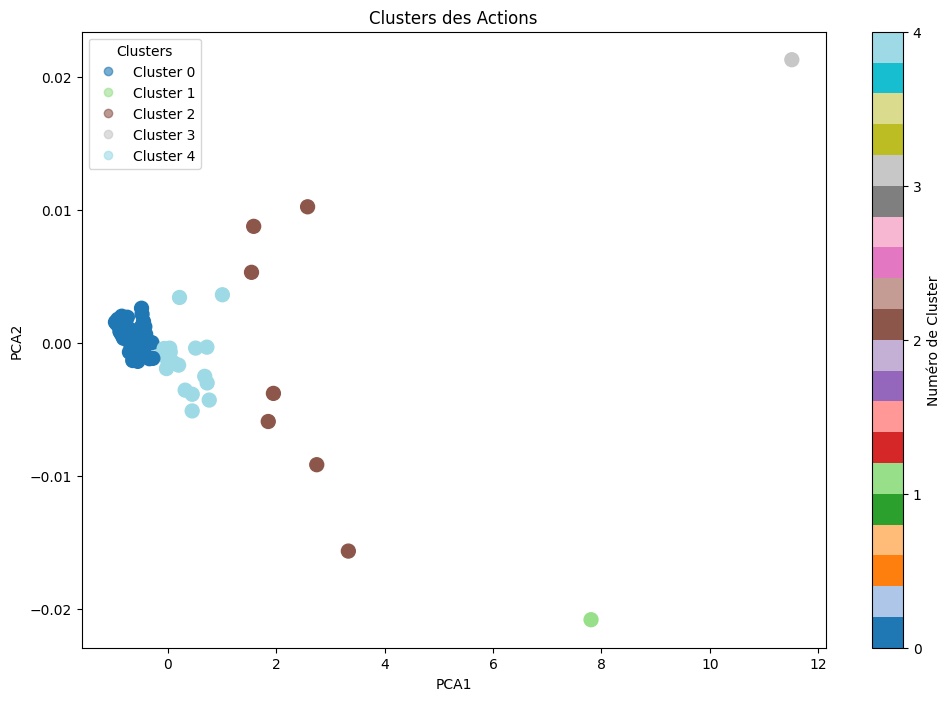

In [17]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# S'assurer que 'Date' est au format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Remplir les valeurs manquantes
df['High'].fillna(df['High'].mean(), inplace=True)
df['Low'].fillna(df['Low'].mean(), inplace=True)
df['Close'].fillna(df['Close'].mean(), inplace=True)

# Garder uniquement les colonnes nécessaires
data = df[['Ticker', 'High', 'Low', 'Close']]

# Calculer les moyennes par 'Ticker'
data_grouped = data.groupby('Ticker').mean()

# Normaliser les données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_grouped)

# Clustering avec K-Means
k = 5  # Nombre de clusters
kmeans = KMeans(n_clusters=k, n_init=10)  # Paramètre n_init explicitement défini
kmeans.fit(scaled_data)
labels = kmeans.labels_

# Ajouter les étiquettes de cluster au DataFrame des moyennes
data_grouped['Cluster'] = labels

# Grouper les tickers par leurs étiquettes de cluster
clustered_stocks = data_grouped.groupby('Cluster').apply(lambda x: list(x.index)).reset_index()

# Afficher les tickers pour chaque cluster
for cluster, tickers in clustered_stocks.itertuples(index=False):
    print(f"Cluster {cluster}:")
    print(tickers)
    print("\n")

# Visualisation des clusters avec PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='tab20', s=100)

# Créer une légende avec les numéros de clusters
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend_labels = [f"Cluster {i}" for i in range(k)]
plt.legend(handles, legend_labels, title="Clusters")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters des Actions')
plt.colorbar(scatter, ticks=range(k)).set_label('Numéro de Cluster')
plt.savefig('/kaggle/working/clusters_plot.png')
plt.show()


# Interprétation
### Cluster 0:
- Tickers: ALKIM, ASSMA, AST, BIAT, ICF, PLTU, SIMPA
- Interprétation:
  - Les actions de ce cluster montrent des tendances de prix stables avec des niveaux de support et de résistance bien définis. Elles réagissent de manière similaire aux fluctuations du marché.
  - Actions des investisseurs:
    - Investissement à long terme : Investir dans ces actions pour leur stabilité.
    - Stratégies conservatrices: Adapter des stratégies telles que l'achat et la détention ("buy and hold").

### Cluster 1 :
- Tickers: ADWYA, AETEC, AMI, AMS, AMV, ARTES, ASSAD, ATB, ATL, BHL, BL, BNA, BT, CC, CELL, CITY, CREAL, ELBEN, GIF, HL, LNDOR, LSTR, MGR, MIP, MPBS, NAKL, NBL, OTH, PGH, PLAST, SAH, SAM, SCB, SERVI, SIAME, SIPHA, SITS, SMD, SOKNA, SOMOC, SOPAT, SOTEM, SOTET, SOTUV, SPDIT, SPHAX, STB, STEQ, STIP, STPAP, STPIL, TAIR, TGH, TINV, TLNET, TPR, TRE, UADH, UMED, WIFAK, XABYT
- Interprétation:
  - Ce cluster regroupe un grand nombre d'entreprises avec des comportements de prix homogènes, indiquant des réactions similaires aux facteurs macroéconomiques.
  - Actions des investisseurs:
    - Diversification : Utiliser ces actions pour diversifier un portefeuille.
    - Analyse sectorielle : Identifier les secteurs dominants dans ce cluster pour des investissements ciblés.

 ### Cluster 2 :
- Ticker: AL
- Interprétation:
  - L'action AL présente des caractéristiques de prix uniques, montrant une volatilité particulière ou des facteurs spécifiques influençant cette action.
    - Actions des investisseurs:
    - Investissement spéculatif: Considérer cette action pour des investissements spéculatifs en raison de ses caractéristiques uniques.
    - Surveillance accrue : Nécessite une surveillance continue pour réagir rapidement aux changements de marché.

### Cluster 3 :
- Tickers: AB, BH, BHASS, BTE, CIL, DH, ECYCL, MAG, MNP, SFBT, SMART, STA, TJARI, TJL, TLS, TVAL, UBCI, UIB
- Interprétation:
  - Ce cluster contient des entreprises avec des tendances de prix stables et prévisibles, souvent associées à des profils financiers solides.
  - Actions des investisseurs:
    - Portefeuille équilibré : Utiliser ces actions pour équilibrer un portefeuille.
    - Stratégies à rendement modéré : Adapter des stratégies axées sur un rendement modéré, comme les investissements en dividendes ou la croissance régulière.

### Cluster 4 :
- Ticker: STAR
- Interprétation:
  - L'action STAR présente des schémas de prix uniques, indiquant une volatilité plus élevée ou des réponses distinctes aux événements du marché. Cette action pourrait réagir de manière plus prononcée aux fluctuations du marché par rapport aux autres clusters.
  - Actions des investisseurs:
    - Investissement dynamique : Les investisseurs intéressés par des gains potentiellement rapides pourraient choisir cette action pour des stratégies d'investissement dynamique.
    - Gestion active : Cette action nécessite une gestion active et une réévaluation fréquente pour maximiser les gains et minimiser les risques. Les investisseurs doivent surveiller de près les nouvelles et les événements susceptibles d'influencer cette action.
